# A recurrent layer in Keras

In [1]:
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
# The following example returns the full state sequence:
# return_sequance : it is used to return the sequances as it processes
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
# adding some more layers
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Preparing the IMDB data

In [8]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Training the model with Embedding and SimpleRNN layers

In [10]:
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 45s 266ms/step - loss: 0.6181 - acc: 0.6432 - val_loss: 0.6762 - val_acc: 0.6190
Epoch 2/10
157/157 [==============================] - 42s 264ms/step - loss: 0.4040 - acc: 0.8256 - val_loss: 0.3815 - val_acc: 0.8386
Epoch 3/10
157/157 [==============================] - 40s 257ms/step - loss: 0.3026 - acc: 0.8769 - val_loss: 0.4016 - val_acc: 0.8232
Epoch 4/10
157/157 [==============================] - 40s 254ms/step - loss: 0.2437 - acc: 0.9041 - val_loss: 0.4277 - val_acc: 0.8102
Epoch 5/10
157/157 [==============================] - 42s 264ms/step - loss: 0.1778 - acc: 0.9334 - val_loss: 0.3898 - val_acc: 0.8522
Epoch 6/10
157/157 [==============================] - 41s 262ms/step - loss: 0.1198 - acc: 0.9592 - val_loss: 0.5586 - val_acc: 0.8338
Epoch 7/10
157/157 [==============================] - 41s 259ms/step - loss: 0.0743 - acc: 0.9760 - val_loss: 0.5484 - val_acc: 0.8036
Epoch 8/10
157/157 [==============================] - 4

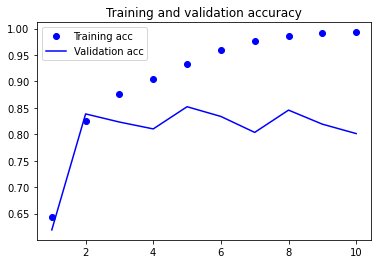

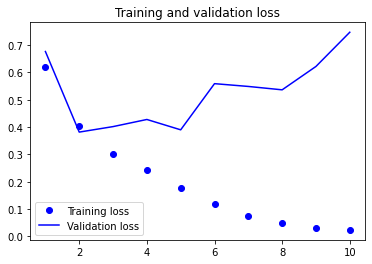

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Using the LSTM layer in Keras

In [13]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 121s 727ms/step - loss: 0.5794 - acc: 0.6916 - val_loss: 0.4858 - val_acc: 0.7666
Epoch 2/10
157/157 [==============================] - 99s 627ms/step - loss: 0.3494 - acc: 0.8554 - val_loss: 0.5288 - val_acc: 0.8058
Epoch 3/10
157/157 [==============================] - 113s 719ms/step - loss: 0.2693 - acc: 0.8945 - val_loss: 0.4499 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 107s 683ms/step - loss: 0.2292 - acc: 0.9126 - val_loss: 0.2947 - val_acc: 0.8726
Epoch 5/10
157/157 [==============================] - 112s 713ms/step - loss: 0.1967 - acc: 0.9255 - val_loss: 0.4856 - val_acc: 0.8378
Epoch 6/10
157/157 [==============================] - 120s 763ms/step - loss: 0.1736 - acc: 0.9374 - val_loss: 0.4299 - val_acc: 0.8362
Epoch 7/10
157/157 [==============================] - 115s 731ms/step - loss: 0.1642 - acc: 0.9431 - val_loss: 0.3022 - val_acc: 0.8812
Epoch 8/10
157/157 [=============================